# Trabalho de Análise Exploratória de Dados

## Projeto 7: Pedagogo Analítico
## Professor: Ricardo Coelho
## Membros da equipe:

*   **Bruno Igor Sousa Vasconcelos**
*   **Luís Miguel Frazão de Sousa**
*   **Yuri Rodrigues Matos**





## Importando os dados e as bibliotecas

Nesse momento inicial, é necessário importar a base de dados e as bibliotecas que vão auxiliar nas manipulações no conjunto de dados.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from scipy.stats import skew, kurtosis

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Calculando as medidas resumo para o 'math score'

Na célula abaixo, foi feito o cálculo das medidas resumos/descritivas, sendo elas:

**Medidas de Tendência Central**

---



*   Média: valor médio/centro de massa das notas de matemática;
*   Mediana: valor central da distribuição;
*   Moda: valor mais frequente observado.

**Medidas de Dispersão**


---



*   Amplitude: diferença entre os extremos;
*   Variância (amostral): grau médio de dispersão dos dados em torno da média;
*   Desvio padrão: raiz quadrada da variância, interpretável na mesma unidade da variável;
*   Coeficiente de variação: desvio padrão relativo em relação à média, expresso em percentual, também usado para comparar a variabilidade entre diferentes variáveis.



No contexto da primeira questão, as medidas centrais apontam onde as notas se acumularam na distribuição, enquanto as medidas de dispersão mostram as possiveis variações na acumulação. Além disso, foi optado a resolução de cada medida individualmente, para fins de organização, porém uma alternativa de listar as medidas resumo de uma coluna ou até mesmo de um conjunto de dados usando funções disponíveis nas bibliotecas importadas foi deixada comentada ao final da célula abaixo.

In [ ]:
math_score = df['math score']

# Medidas de tendência central
media = math_score.mean()
mediana = math_score.median()
moda = math_score.mode()[0] if not math_score.mode().empty else np.nan

# Medidas de dispersão
amplitude = math_score.max() - math_score.min()
variancia = math_score.var()
desvio_padrao = math_score.std()
coef_var = (desvio_padrao / media) * 100 if media != 0 else np.nan

# Outras medidas-resumo

minimo = math_score.min()
maximo = math_score.max()

print('Medidas de tendência central\n')
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print('\nMedidas de dispersão\n')
print(f"Amplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio padrão: {desvio_padrao}")
print(f"Coeficiente de Variação: {coef_var:.2f}%")
print('\nOutras medidas-resumo\n')
print(f"Mínimo: {minimo}")
print(f"Mánimo: {maximo}")
print("\n------------------------------------------------------\n")

# df['math score'].describe()

Medidas de tendência central

Média: 66.089
Mediana: 66.0
Moda: 65

Medidas de dispersão

Amplitude: 100
Variância: 229.91899799799796
Desvio padrão: 15.16308009600945
Coeficiente de Variação: 22.94%

Outras medidas-resumo

Mínimo: 0
Mánimo: 100


## 2. Comparação as distribuições das notas de matemática, leitura e escrita (math, reading e writing score) usando boxplots.

Os métodos estatísticos de visualização gráfica mais comuns são:



*   Histograma: Gráfico de barras contínuas que representa a distribuição de uma variável quantitativa dividida em classes (ou intervalos);
*   Boxplot: Representa cinco medidas resumo (mínimo, Q1, mediana, Q3 e máximo), além de possíveis outliers;
*   Gráficos de Barra: Barras retangulares cuja altura é proporcional à frequência (absoluta ou relativa) de uma variável categórica;
*   Gráficos de setores: Representa proporções de categorias como segmentos de um círculo;
*   Gráfico de Dispersão: Representa pares ordenados (x,y) em um plano cartesiano;
*   Gráfico de Linhas: Liga pontos com uma linha para mostrar a evolução de uma variável ao longo do tempo ou de outra dimensão.



Na segunda questão, foi utilizado o boxplot para gerar as visualizações das três distribuições de notas. Com esse gráfico, foi possível comparar a assimetria, presença de outliers e amplitude interquartílica das variáveis. E o seu uso com as três colunas simultaneamente permite uma comparação direta da distribuição de desempenho dos alunos entre os exames avaliadas. O que permite levantar resultados, nos quais mostram que existem mais notas baixas extremas e que a média do 'math score' é mais baixa em relação ao outros exames.

Text(0.5, 1.0, 'Distribuições das Notas')

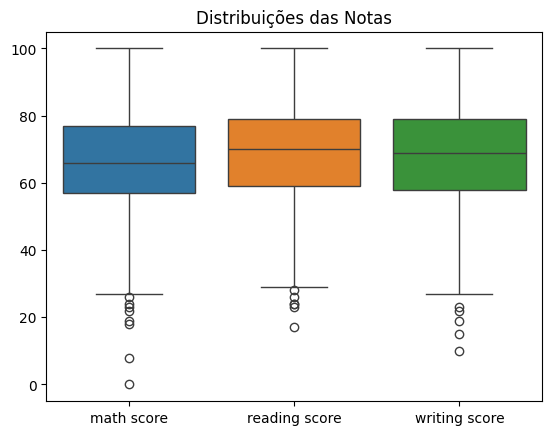

In [5]:
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Distribuições das Notas')

## 3. Assimetria e curtose para as três notas

Outras medidas que também auxiliam no trabalho estatístico são:



*   Assimetria: A assimetria mede o grau de distorção ou desvio da simetria de uma distribuição de dados em relação à média. Ela indica se os valores estão mais concentrados à direita ou à esquerda da média.
*   Curtose: A curtose descreve o grau de concentração dos dados em torno da média e o comportamento das caudas da distribuição.

O cálculo das duas medidas nos ajuda a encontrar as seguintes situações:



*   'math score': leve assimetria à esquerda e levemente leptocúrtica. Isso implica que a maioria dos alunos tende a se agrupar ao redor da média de matemática, mas com uma leve presença de notas mais baixas.
*   'reading score': leve assimetria à esquerda e levemente platicúrtica. Isso implica que há uma distribuição um pouco mais espalhada nas notas de leitura, sem presença de muitos extremos.
*   'writing score': leve assimetria à esquerda e levemente platicúrtica. Isso implica que a distribuição de notas de escrita também é levemente descentralizada com poucos extremos, sugerindo uma variação moderada.

As três variáveis apresentam distribuições fracamente assimétrica, com leve inclinação negativa, ou seja, há uma tendência suave de que existam mais alunos com notas altas e menos com notas extremamente baixas. Além disso, as medidas de Curtose próximas de zero mostram uma distribuição bem perto da normal com pequenas variações na forma. **Portanto, é possível afirmar que elas seguem uma distribuição similar, o que viabiliza a comparação direta entre as variáveis.**





In [6]:
for col in ['math score', 'reading score', 'writing score']:
    print(f'{col}: Assimetria = {skew(df[col])}, Curtose = {kurtosis(df[col])}')

math score: Assimetria = -0.278516571914075, Curtose = 0.26759715461497846
reading score: Assimetria = -0.25871569927829347, Curtose = -0.07391861478331307
writing score: Assimetria = -0.28900962452114176, Curtose = -0.03919203131162252


## 4. Percentual de alunos por grupo étnico

O cálculo de percentual por categoria ajuda a reinvidicar estatísticas sobre uma determinada conjectura. Por exemplo, ao calcular o percentual dos alunos por raça, revela-se uma assimetria/distribuição desigual, na qual:



*   Com 31,9% dos estudantes, o grupo C é o mais representado na amostra. O que significa que 1 a cada 3 pessoas pertece a esse grupo
*   O grupo D, com 26,2%, também possui uma boa quantidade, ligeiramente inferior à do grupo C.
*   O grupo B representa quase 1/5 da amostra, com 19%.
*   O grupo E aparece com 14,0%, uma representação consideravelmente menor.
*   O grupo A tem a menor participação, com apenas 8,9% dos estudantes, ou seja, menos de 1 em cada 10.


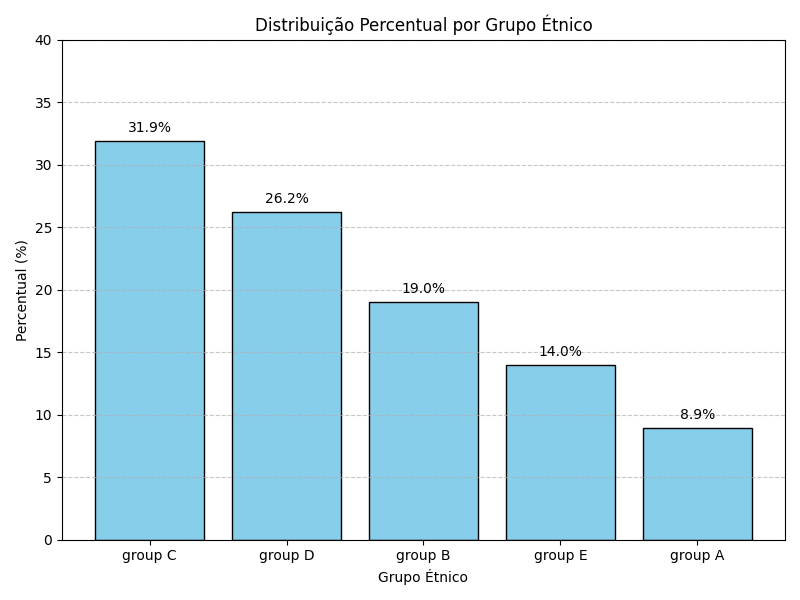

Ao verificar essas discrepâncias, percebe-se que a distribuição não é uniforme, o que pode impactar em análises posteriores, como por exemplo, comparações de desempenho escolar entre raças.

In [7]:
alunos_por_etnia = df['race/ethnicity'].value_counts(normalize=True) * 100
print(alunos_por_etnia)

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64


## 5. Discretização da nota de matemática em faixas (ex: A, B, C...)

Na análise e interpretação das notas de matemática, as variáveis quantitativas foram transformadas em variáveis qualitativas por meio de discretização. Essa medida permite agrupar os alunos em faixas de desempenho, tornando possível a comparação entre grupos e a identificação de padrões de desempenho.

O sistema adotado para a discretização está exposto no código a seguir.



In [8]:


criterios = pd.DataFrame({
    'Faixa': ['A', 'B', 'C', 'D', 'F'],
    'Intervalo de Notas': ['85–100', '70–84', '60–69', '50–59', '0–49'],
    'Categoria': [
        'Excelente Desempenho',
        'Bom Desempenho',
        'Desempenho Médio',
        'Desempenho Baixo',
        'Desempenho Muito Baixo'
    ]
})

print("Discretização da Nota de Matemática:")
display(criterios)

def categorizar_math(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'F'

df['math_faixa'] = df['math score'].apply(categorizar_math)

freq_abs = df['math_faixa'].value_counts().sort_index()

freq_rel = freq_abs / freq_abs.sum()

freq_acum = freq_abs.cumsum()

freq_perc = round(freq_rel * 100, 1)

tabela_completa = pd.DataFrame({
    'Faixa': freq_abs.index,
    'Frequência Absoluta': freq_abs.values,
    'Frequência Relativa': freq_rel.values,
    'Frequência Acumulada': freq_acum.values,
    'Percentual (%)': freq_perc.values
})

ordem_faixas = ['A', 'B', 'C', 'D', 'F']
tabela_completa = tabela_completa.set_index('Faixa').reindex(ordem_faixas).reset_index()

print("Tabela Completa de Frequências das Faixas de Nota em Matemática:")
display(tabela_completa)

Discretização da Nota de Matemática:


,Faixa,Intervalo de Notas,Categoria
0,A,85–100,Excelente Desempenho
1,B,70–84,Bom Desempenho
2,C,60–69,Desempenho Médio
3,D,50–59,Desempenho Baixo
4,F,0–49,Desempenho Muito Baixo


Tabela Completa de Frequências das Faixas de Nota em Matemática:


,Faixa,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Percentual (%)
0,A,117,0.117,117,11.7
1,B,292,0.292,409,29.2
2,C,268,0.268,677,26.8
3,D,188,0.188,865,18.8
4,F,135,0.135,1000,13.5


## 6. Associação entre gênero e curso preparatório

Na análise a seguir, foi estudado a associação entre as variáveis de gênero e a conclusão do curso preparatório, que revela que há uma . A partir dos dados, **observou-se que a proporção de alunas que completaram o curso preparatório foi maior do que a de alunos**. Isso sugere que meninas tendem a participar mais desse tipo de preparação do que meninos.

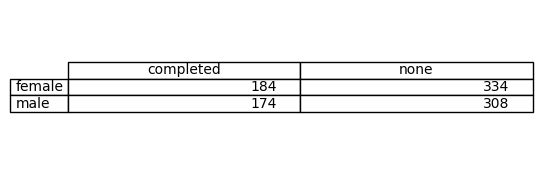

In [9]:
from scipy.stats import chi2_contingency
from math import sqrt

contingencia = pd.crosstab(df['gender'], df['test preparation course'])


chi2, p_valor, dof, expected = chi2_contingency(contingencia)

n = contingencia.to_numpy().sum()
k = min(contingencia.shape) - 1
phi = sqrt(chi2 / n)
v_cramer = sqrt(chi2 / (n * k))

p_fem = df[df['gender'] == 'female']['test preparation course'].value_counts(normalize=True).get('completed', 0)
p_masc = df[df['gender'] == 'male']['test preparation course'].value_counts(normalize=True).get('completed', 0)
dif_prop = round(p_fem - p_masc, 3)

print("Tabela de Contingência:")
display(contingencia)

print(f"V de Cramer: {v_cramer:.3f}")
print(f"Coeficiente Phi: {phi:.3f}")
print(f"Estatística Qui-Quadrado: {chi2:.3f}")
print(f"Diferença de proporções (F - M): {dif_prop:.3f}")


Tabela de Contingência:


test preparation course,completed,none
gender,,
female,184,334
male,174,308


V de Cramer: 0.004
Coeficiente Phi: 0.004
Estatística Qui-Quadrado: 0.016
Diferença de proporções (F - M): -0.006


## 7. Coeficiente Phi (ou V de Cramer)

Como já visto no teste passado, sabe-se que existe uma associação. Então, para medir a força da associação foi usado:



---



*   Qui-quadrado: O teste do Qui-Quadrado é uma medida estatística usada para verificar se existe uma associação significativa entre duas variáveis qualitativas . Ele compara os valores observados em uma tabela de contingência com os valores esperados sob a hipótese de independência.
*   Coeficiente de Phi: O coeficiente Phi é uma medida de associação entre duas variáveis categóricas binárias (ou seja, em uma tabela 2x2). Ele transforma o valor do qui-quadrado em uma escala padrão entre 0 e 1.

Em resumo, os dados e os resultados mostram:



*   Existe uma diferença de comportamento entre gêneros em relação ao curso preparatório;
*   Essa diferença é estatisticamente relevante, mas a força da associação é pequena.





In [10]:
print(f"Coeficiente Phi: {phi:.3f}")
print(f"Estatística Qui-Quadrado: {chi2:.3f}")

Coeficiente Phi: 0.004
Estatística Qui-Quadrado: 0.016


## 8. Correlação entre notas de matemática e leitura

Para analisar a relação entre duas variáveis quantitativas, como a 'math score' e 'reading score', usa-se:



---



*   Correlação: Correlação é uma medida estatística que expressa o grau e a direção da relação linear entre duas variáveis numéricas - pode variar no intervalo de -1 a 1.

E a partir dela, podemos inferir:



---




*   A correlação de 0.818 indica uma associação forte e positiva entre as notas de matemática e leitura.
*   Isso significa que, em geral, os estudantes que apresentam boas notas em matemática tendem também a ter boas notas em leitura, e o mesmo vale para notas mais baixas.
*   Por outro lado, o valor não é exatamente 1, o que indica que, embora exista uma forte relação linear, ela não é 100% simetrica ou perfeita — há variabilidade individual no desempenho dos alunos.





In [11]:
corr = df[['math score', 'reading score']].corr(method='pearson')
corr

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


## 9. Diferença nas notas de matemática por nível de escolaridade dos pais

O gráfico apresentado é um boxplot, que mostra a distribuição das notas de matemática em função do nível de escolaridade dos pais. Tendo como principais observações de medidas:



---



*   A mediana é maior para os filhos de pais com bachelor's degree e master's degree.
*   Todos os grupos mostram uma variabilidade semelhante nas notas.
*   Há outliers negativos (notas muito baixas) especialmente nos grupos com escolaridade mais baixa.
*   Existe uma tendência positiva: quanto maior a escolaridade dos pais, maior tende a ser a nota de matemática dos filhos.

**Portanto, a nota média de matemática varia conforme o nível de escolaridade dos pais, com tendência de notas mais altas entre alunos cujos pais têm maior formação acadêmica**.



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

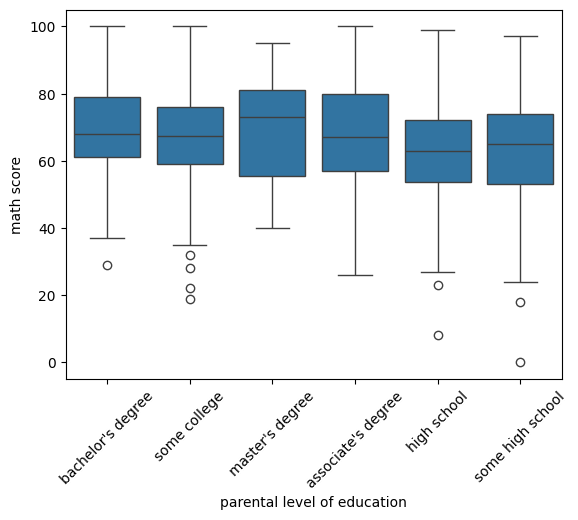

In [12]:
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)

## 10. Comparar writing score por curso preparatório

Na análise entre os alunos que concluíram o curso e não concluíram, pode-se concluir que:



---



*   O grupo de alunos que completou o curso preparatório (completed) apresenta uma mediana de notas de escrita visivelmente superior em comparação ao grupo que não o fez (none).
*   A distribuição das notas para o grupo que completou o curso é mais compacta. Isso significa que o intervalo interquartil é menor, indicando que os resultados desses alunos são mais consistentes e menos dispersos do que os do outro grupo.



<Axes: xlabel='test preparation course', ylabel='writing score'>

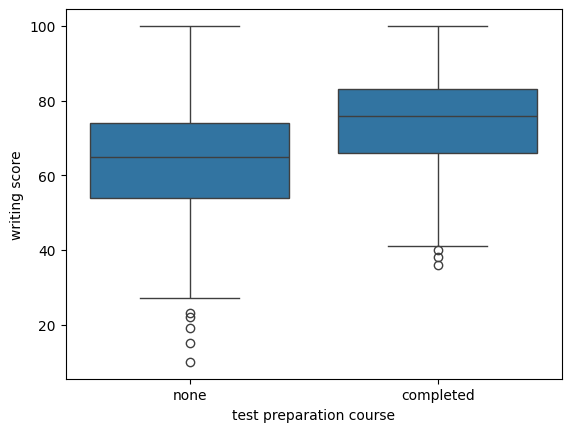

In [13]:
sns.boxplot(x='test preparation course', y='writing score', data=df)